In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import ClassDepLossMultilayerPerceptron

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [10]:
X, y = datasets.make_circles(n_samples=800, noise=0.2, factor=.3, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


# Multilayer Perceptron without PU

('Epoch:', '0001', 'cost=', '0.696023747')
('Epoch:', '0006', 'cost=', '0.538436234')
('Epoch:', '0011', 'cost=', '0.528205916')
('Epoch:', '0016', 'cost=', '0.525703952')
('Epoch:', '0021', 'cost=', '0.523391560')
('Epoch:', '0026', 'cost=', '0.525233641')
('Epoch:', '0031', 'cost=', '0.523084298')
('Epoch:', '0036', 'cost=', '0.527360871')
('Epoch:', '0041', 'cost=', '0.522063181')
('Epoch:', '0046', 'cost=', '0.520905942')
('Epoch:', '0051', 'cost=', '0.523672506')
('Epoch:', '0056', 'cost=', '0.520689443')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

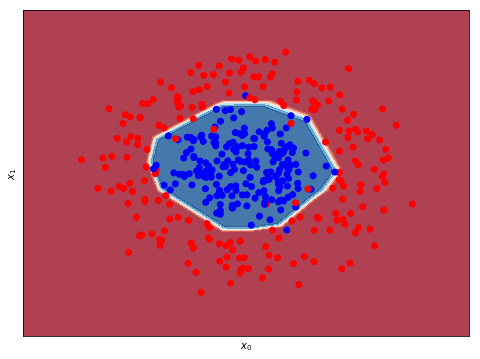

In [11]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=60,
                          verbose=True)
fit_plot(X_train, Y_train, mp)

# PU setup

In [12]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.841827825')
('Epoch:', '0006', 'cost=', '0.797554627')
('Epoch:', '0011', 'cost=', '0.787420601')
('Epoch:', '0016', 'cost=', '0.756090462')
('Epoch:', '0021', 'cost=', '0.732887924')
('Epoch:', '0026', 'cost=', '0.728306234')
('Epoch:', '0031', 'cost=', '0.731788382')
('Epoch:', '0036', 'cost=', '0.722740412')
('Epoch:', '0041', 'cost=', '0.729772374')
('Epoch:', '0046', 'cost=', '0.723493680')
('Epoch:', '0051', 'cost=', '0.722387388')
('Epoch:', '0056', 'cost=', '0.720063880')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

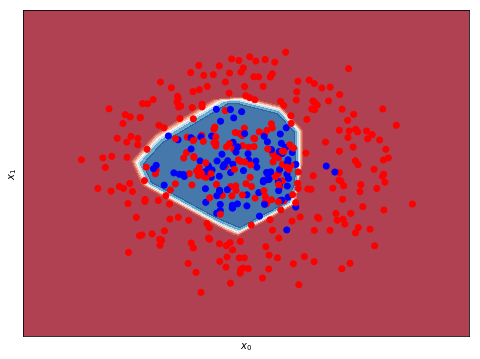

In [14]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=60,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '1.028427243')
('Epoch:', '0006', 'cost=', '1.013216317')
('Epoch:', '0011', 'cost=', '0.988924056')
('Epoch:', '0016', 'cost=', '0.956941620')
('Epoch:', '0021', 'cost=', '0.913448244')
('Epoch:', '0026', 'cost=', '0.880800664')
('Epoch:', '0031', 'cost=', '0.871121511')
('Epoch:', '0036', 'cost=', '0.867109597')
('Epoch:', '0041', 'cost=', '0.864579499')
('Epoch:', '0046', 'cost=', '0.862428844')
('Epoch:', '0051', 'cost=', '0.860450074')
('Epoch:', '0056', 'cost=', '0.859246507')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

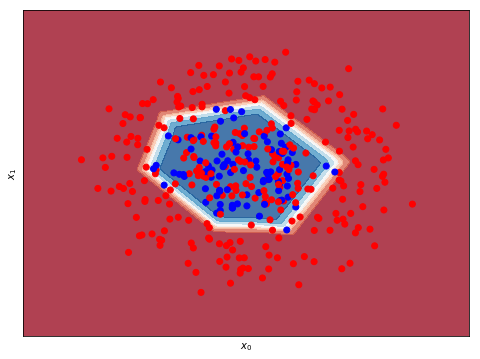

In [15]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=1e-2,
                          regularization=0,
                          training_epochs=60,
                          class_weight=[.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp)

('Using class_weight', array([ 1.        ,  3.23157895]))
('Epoch:', '0001', 'cost=', '0.429237403')
('Epoch:', '0006', 'cost=', '0.417503528')
('Epoch:', '0011', 'cost=', '0.417503528')
('Epoch:', '0016', 'cost=', '0.417503536')
('Epoch:', '0021', 'cost=', '0.417503498')
('Epoch:', '0026', 'cost=', '0.417503521')
('Epoch:', '0031', 'cost=', '0.417503521')
('Epoch:', '0036', 'cost=', '0.417503521')
('Epoch:', '0041', 'cost=', '0.417503528')
('Epoch:', '0046', 'cost=', '0.417503513')
('Epoch:', '0051', 'cost=', '0.417503513')
('Epoch:', '0056', 'cost=', '0.417503528')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

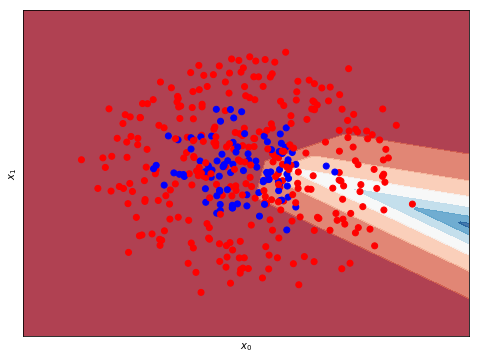

In [16]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=60,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp)

('Using class_weight', array([ 1.        ,  6.46315789]))
('Epoch:', '0001', 'cost=', '0.666192546')
('Epoch:', '0006', 'cost=', '0.564416453')
('Epoch:', '0011', 'cost=', '0.500638679')
('Epoch:', '0016', 'cost=', '0.481416136')
('Epoch:', '0021', 'cost=', '0.474967092')
('Epoch:', '0026', 'cost=', '0.475114964')
('Epoch:', '0031', 'cost=', '0.470915973')
('Epoch:', '0036', 'cost=', '0.475269325')
('Epoch:', '0041', 'cost=', '0.474394880')
('Epoch:', '0046', 'cost=', '0.467875622')
('Epoch:', '0051', 'cost=', '0.465304576')
('Epoch:', '0056', 'cost=', '0.468304336')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

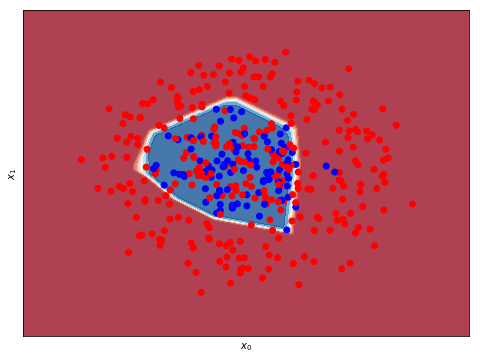

In [17]:
cdmp = ClassDepLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-2,
                          regularization=0,
                          training_epochs=60,
                          class_weight=[0.5, 1],
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), cdmp)